In [1]:
import matplotlib.pyplot as plt
from endfiresim.wave import CWaveModelPlanar
from endfiresim.sensor import CSensor
import numpy as np

Effective gain (1) for incident direction:  0.0 dB
Effective gain (2) for incident direction:  0.0 dB


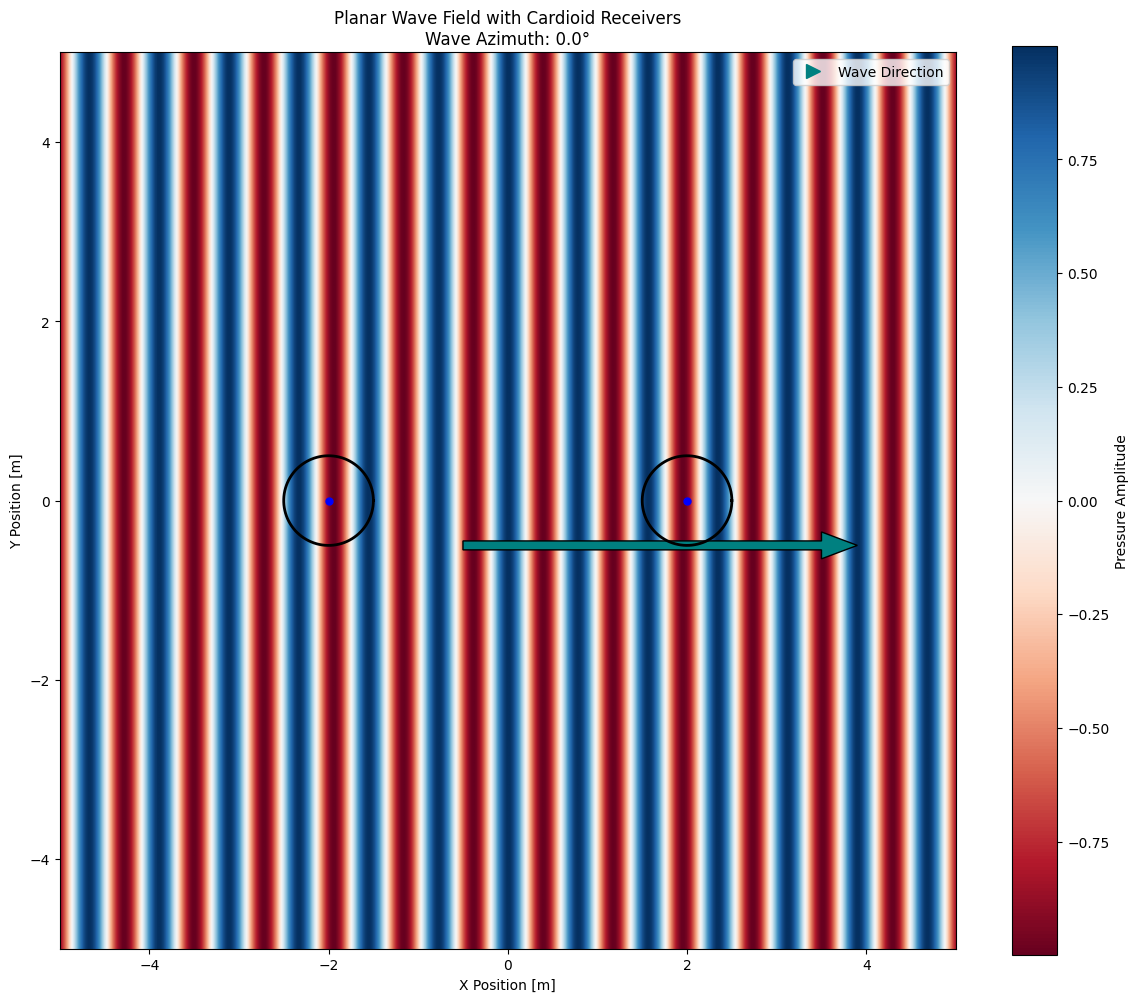

In [2]:
# Basic properties
freq = 440
azim_wave = 0
fs = 48000
dur = 1.0

# Scenario objects
ts = np.arange(0, dur, 1/fs)
cardioid_pos = (0, 0)  # Position of cardioid in the plot
cardioid1 = CSensor((-2, 0, 0))
cardioid2 = CSensor((2, 0, 0))
pw = CWaveModelPlanar(freq, azim=azim_wave)
signal1, gain1 = cardioid1.receive(pw, ts)
signal2, gain2 = cardioid2.receive(pw, ts)

# Computed gain for incident
gain1 = 20*np.log10(gain1)
gain2 = 20*np.log10(gain2)
print("Effective gain (1) for incident direction: ", np.round(gain1, 2), "dB")
print("Effective gain (2) for incident direction: ", np.round(gain2, 2), "dB")

# Entire wave as heatmap
x = np.linspace(-5, 5, 1000)
x, y = np.meshgrid(x, x)
z = np.zeros_like(x)
p = pw.p(0, (x, y, z))

# Create figure
fig, ax = plt.subplots(figsize=(12, 10))

# Plot wave field
im = ax.imshow(np.real(p), 
               extent=[x.min(), x.max(), y.min(), y.max()],
               cmap='RdBu', 
               origin='lower')

# Direction arrow for wave
arrow_length = 0.8 * min(x.max(), y.max())
ax.arrow(0.1*x.min(), 0.1*y.min(), 
         arrow_length*np.cos(azim_wave), arrow_length*np.sin(azim_wave),
         width=0.1, head_width=0.3, head_length=0.4,
         fc='teal', ec='k')

cardioid1.to_plot(ax)
cardioid2.to_plot(ax)

# Add labels and decorations
ax.set_xlabel('X Position [m]')
ax.set_ylabel('Y Position [m]')
ax.set_title(f'Planar Wave Field with Cardioid Receivers\n'
             f'Wave Azimuth: {np.rad2deg(azim_wave):.1f}°')
plt.colorbar(im, label='Pressure Amplitude')
ax.set_aspect('equal')

# Add legend
wave_arrow = plt.Line2D([0], [0], color='teal', marker='>', linestyle='None',
                        markersize=10, label='Wave Direction')
ax.legend(handles=[wave_arrow])

plt.tight_layout()
plt.show()